In [1]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://github.com/jesugome/InfluencersInSocialNetworks/raw/master/logoAnalytics.png")

<h2><center>
# Birds

![Image of Yaktocat](http://tremendouswallpapers.com/wp-content/uploads/2014/12/Venette-Waste_Trend-F-W-14-15_Neat-Graphics_mandarin-duck.jpg)
    
 ## Machine Learning Project

Developed by [Jesus Solano](http://www.jesussolano.com/) -- [Sergio Castelblanco](http://www.jesussolano.com/) -- [Jose Sandoval](http://www.jesussolano.com/) -- [Aleksey Sepulveda](http://www.jesussolano.com/)


version 8.3, 12 July 2018

In [2]:
# Download datasets.

import os.path

# If datasets already exist do nothing. 

if not os.path.exists('birds.zip'):
  ! wget http://www-cvr.ai.uiuc.edu/ponce_grp/data/birds/birds.zip
    
if not os.path.exists('birds_f_numbers.txt'):
  ! wget http://www-cvr.ai.uiuc.edu/ponce_grp/data/birds/birds_f_numbers.txt
    
if not os.path.exists('birds_training_pairs.txt'):
  ! wget http://www-cvr.ai.uiuc.edu/ponce_grp/data/birds/birds_training_pairs.txt 


In [3]:
import os 
import zipfile

# Extract images zip file
with zipfile.ZipFile("birds.zip","r") as zip_ref:
    zip_ref.extractall(os.getcwd())


Using TensorFlow backend.


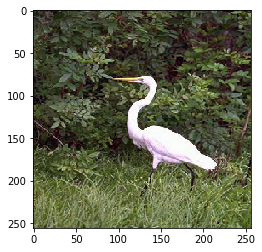

In [6]:
%matplotlib inline

import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

img = load_img('birds/egret/egr013.jpg',grayscale=False,target_size=(256,256),interpolation='nearest')  # this is a PIL image
x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
plt.imshow(x/255)

In [7]:
import random

randomList= random.sample(range(1,101),100)

formating = "{:03d}".format

formatedList = [formating(item) for item in randomList]

In [8]:
# Resize images to 256X256
from PIL import Image

basewidth = 256
hsize = 256

paths=['egret','mandarin','owl','puffin','toucan','wood_duck']

for j in paths[:]:
    if(j=='egret'):
        pre='/egr'
    elif(j=='mandarin'):
        pre='/man'
    elif(j=='owl'):
        pre='/owl'
    elif(j=='puffin'):
        pre='/puf'
    elif(j=='wood_duck'):
        pre='/wod'
    elif(j=='toucan'):
        pre='/tou'
        
    
    for i in formatedList[:]:
        img = Image.open('birds/'+j+pre+i+'.jpg')
        wpercent = (basewidth/float(img.size[0]))
        img = img.resize((basewidth,hsize), Image.ANTIALIAS)
        img.save('birds/'+j+pre+i+'.jpg') 

In [9]:
# Delete pre existing files.
! rm -r datasets/

In [10]:
from shutil import copy
counter = 0

if not os.path.exists('datasets/train/'):
    os.makedirs('datasets/train/egr')
    os.makedirs('datasets/train/man')
    os.makedirs('datasets/train/tou')
    os.makedirs('datasets/train/owl')
    os.makedirs('datasets/train/puf')
    os.makedirs('datasets/train/wod')
    

if not os.path.exists('datasets/test/'):
    os.makedirs('datasets/test/egr')
    os.makedirs('datasets/test/man')
    os.makedirs('datasets/test/tou')
    os.makedirs('datasets/test/owl')
    os.makedirs('datasets/test/puf')
    os.makedirs('datasets/test/wod')
    

for i in formatedList[:]:
    if counter < 50:
        copy('birds/egret/egr'+i+'.jpg','datasets/train/egr/egr'+i+'.jpg')
        copy('birds/mandarin/man'+i+'.jpg','datasets/train/man/man'+i+'.jpg')
        copy('birds/toucan/tou'+i+'.jpg','datasets/train/tou/tou'+i+'.jpg')
        copy('birds/owl/owl'+i+'.jpg','datasets/train/owl/owl'+i+'.jpg')
        copy('birds/puffin/puf'+i+'.jpg','datasets/train/puf/puf'+i+'.jpg')
        copy('birds/wood_duck/wod'+i+'.jpg','datasets/train/wod/wod'+i+'.jpg')
    
    else: 
        copy('birds/egret/egr'+i+'.jpg','datasets/test/egr/egr'+i+'.jpg')
        copy('birds/mandarin/man'+i+'.jpg','datasets/test/man/man'+i+'.jpg')
        copy('birds/toucan/tou'+i+'.jpg','datasets/test/tou/tou'+i+'.jpg')
        copy('birds/owl/owl'+i+'.jpg','datasets/test/owl/owl'+i+'.jpg')
        copy('birds/puffin/puf'+i+'.jpg','datasets/test/puf/puf'+i+'.jpg')
        copy('birds/wood_duck/wod'+i+'.jpg','datasets/test/wod/wod'+i+'.jpg')        
    
    counter=counter+1

In [17]:
# Data path information.
trainDataPath= 'datasets/train'
testDataPath= 'datasets/test'

# Images dimensions.
widthSize =  256
heightSize = 256

# Batch Size.

batchSize = 16

In [12]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K

outputClasses = 6

if K.image_data_format() == 'channels_first':
    input_shape = (3, widthSize, heightSize)
else:
    input_shape = (widthSize, heightSize, 3)

model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(outputClasses))
model.add(Activation('sigmoid'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 254, 254, 32)      896       
_________________________________________________________________
activation_1 (Activation)    (None, 254, 254, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 125, 125, 32)      9248      
_________________________________________________________________
activation_2 (Activation)    (None, 125, 125, 32)      0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 60, 60, 64)        18496     
__________

In [13]:
# Compile the convolutional neural network

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])


In [18]:
# this is the augmentation configuration we will use for training
trainData = ImageDataGenerator(rescale=1. / 255)

# this is the augmentation configuration we will use for testing:
# only rescaling
testData = ImageDataGenerator(rescale=1. / 255)

trainGenerator = trainData.flow_from_directory(
    trainDataPath,
    target_size=(widthSize, widthSize),
    batch_size=batchSize,
    classes=['egr','man','owl','puf','tou','wod'])

testGenerator = trainData.flow_from_directory(
    testDataPath,
    target_size=(widthSize, widthSize),
    batch_size=batchSize, 
    classes=['egr','man','owl','puf','tou','wod'])

Found 300 images belonging to 6 classes.
Found 300 images belonging to 6 classes.


In [22]:
epochs = 15
totalTrainSamples=300
totalTestSamples= 300

model.fit_generator(
    trainGenerator,
    steps_per_epoch=totalTrainSamples // batchSize,
    epochs=epochs)



Epoch 1/15
18/18 [==============================] - 30s 2s/step - loss: 1.6979 - acc: 0.3206
Epoch 2/15
18/18 [==============================] - 36s 2s/step - loss: 1.5959 - acc: 0.4120
Epoch 3/15
18/18 [==============================] - 34s 2s/step - loss: 1.4260 - acc: 0.4524
Epoch 4/15
18/18 [==============================] - 34s 2s/step - loss: 1.3241 - acc: 0.5543
Epoch 5/15
18/18 [==============================] - 36s 2s/step - loss: 1.2019 - acc: 0.6205
Epoch 6/15
18/18 [==============================] - 37s 2s/step - loss: 1.0760 - acc: 0.6273
Epoch 7/15
18/18 [==============================] - 43s 2s/step - loss: 0.9825 - acc: 0.7048
Epoch 8/15
18/18 [==============================] - 38s 2s/step - loss: 0.8466 - acc: 0.7396
Epoch 9/15
18/18 [==============================] - 38s 2s/step - loss: 0.8020 - acc: 0.7778
Epoch 10/15
18/18 [==============================] - 34s 2s/step - loss: 0.6853 - acc: 0.8206
Epoch 11/15
18/18 [==============================] - 34s 2s/step - lo

In [42]:
from sklearn.metrics import confusion_matrix,classification_report
import pandas as pd

target_names = ['egr','man','owl','puf','tou','wod']

Y_pred = model.predict_generator(testGenerator, totalTestSamples // batchSize+1)
y_pred = np.argmax(Y_pred, axis=1)
print('-------------------------------------------------')
print('-------------------------------------------------')
print('-----------------Confusion Matrix----------------')
print(pd.DataFrame(confusion_matrix(testGenerator.classes, y_pred),columns=target_names, index=target_names))
print('-------------------------------------------------')
print('-------------------------------------------------')
print('---------------Classification Report-------------')

print(classification_report(testGenerator.classes, y_pred, target_names=target_names))

-------------------------------------------------
-------------------------------------------------
-----------------Confusion Matrix----------------
     egr  man  owl  puf  tou  wod
egr    3   12    4   10   15    6
man    7    5   10    5   12   11
owl    7    8    6   10    9   10
puf    8   10    9    7    5   11
tou    6    4   11    3   13   13
wod    5    4    5    9   11   16
-------------------------------------------------
-------------------------------------------------
---------------Classification Report-------------
             precision    recall  f1-score   support

        egr       0.08      0.06      0.07        50
        man       0.12      0.10      0.11        50
        owl       0.13      0.12      0.13        50
        puf       0.16      0.14      0.15        50
        tou       0.20      0.26      0.23        50
        wod       0.24      0.32      0.27        50

avg / total       0.16      0.17      0.16       300



In [29]:
import numpy as np
for x_batch, y_batch in testGenerator:
    print(y_batch)
    yPred = model.predict_classes(x_batch)
    print(model.predict(x_batch).round(1))
    print('The accuracy over the test set is: ', (yPred==y_test[:,0]).mean())
    break
    
    

[[0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]]
[5 0 3 5 5 1 5 2 3 5 5 5 1 1 2 5]
[[0.  0.  0.  0.  0.  0.5]
 [0.4 0.  0.1 0.  0.  0. ]
 [0.  0.  0.  0.1 0.  0. ]
 [0.  0.  0.  0.1 0.  0.3]
 [0.  0.5 0.  0.  0.  0.6]
 [0.  0.2 0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.1 0.6]
 [0.  0.  1.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0. ]
 [0.1 0.  0.  0.  0.  0.4]
 [0.  0.  0.  0.  0.  0.1]
 [0.  0.  0.  0.  0.  1. ]
 [0.  0.6 0.  0.  0.5 0. ]
 [0.  0.6 0.  0.2 0.  0. ]
 [0.1 0.  0.7 0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.4]]


In [ ]:

#Confution Matrix and Classification Report
Y_pred = model.predict_generator(validation_generator, num_of_test_samples // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')
target_names = ['Cats', 'Dogs', 'Horse']
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))